### 用 NumPy 来实现

但是之前接触的只是单个节点的误差项。现在在更新权重时，我们需要考虑隐藏层 每个节点 的误差项 $\delta_j$ ：

$$\Delta W_{ij} = \eta \delta_j x_i$$

现在 $w_{ij}$ 是一个矩阵，所以右侧对应也应该有跟左侧同样的维度。如果用一个列向量数组和一个行向量数组相乘，它会把列向量的第一个元素与行向量的每个元素相乘，组成一个新的二维数组的第一行。列向量的每一个元素依次重复该过程，最后你会得到一个二维数组，形状是  
*(len(column_vector), len(row_vector))*。

```
hidden_error*inputs[:,None]
array([[ -8.24195994e-04,  -2.71771975e-04,   1.29713395e-03],
       [ -2.87777394e-04,  -9.48922722e-05,   4.52909055e-04],
       [  6.44605731e-04,   2.12553536e-04,  -1.01449168e-03],
       [  0.00000000e+00,   0.00000000e+00,  -0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,  -0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,  -0.00000000e+00]])
```

这正好是计算权重更新的步长的方式。如果输入是一个一行的二维数组，可以用 hidden_error*inputs.T，但如果 inputs 是一维数组，就不行。

#### 反向传播练习
接下来用代码来实现一项数据，两层神经网络的反向传播。

* 计算网络输出误差
* 计算输出层误差项
* 用反向传播计算隐藏层误差项
* 计算反向传播误差的权重更新步长

In [34]:
import numpy as np

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])
weights_hidden_output = np.array([0.1, -0.3])

x = x.reshape(3,1)
weights_input_hidden = weights_input_hidden.reshape(2,3)
weights_hidden_output = weights_hidden_output.reshape(1,2)

print(x.shape, weights_input_hidden.shape, weights_hidden_output.shape)

## Forward pass
hidden_layer_input = np.dot(weights_input_hidden, x)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(weights_hidden_output, hidden_layer_output)
output = sigmoid(output_layer_in)

## Backwards pass
## Calculate output error
error = target - output

# Calculate error term for output layer
output_error_term = error * output * (1 - output)

# Calculate error term for hidden layer
hidden_error_term = np.dot(weights_hidden_output.T, output_error_term) * \
                    hidden_layer_output * (1 - hidden_layer_output)

# Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * output_error_term * hidden_layer_output.T
# Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * hidden_error_term * x.T

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)

(3, 1) (2, 3) (1, 2)
Change in weights for hidden layer to output layer:
[[0.0080988  0.00661094]]
Change in weights for input layer to hidden layer:
[[ 1.85301465e-04  3.70602930e-05 -7.41205859e-05]
 [-5.52590207e-04 -1.10518041e-04  2.21036083e-04]]


# 实现梯度下降算法

在该 Lab 中，实现构建梯度下降算法的基本函数，以便在小数据集中查找数据边界。首先绘制和可视化数据。

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## 读取与绘制数据

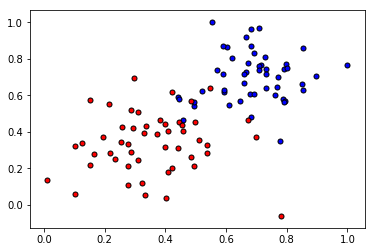

In [4]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [5]:
print(X[0:5])
print(y[0:5])

[[ 0.78051  -0.063669]
 [ 0.28774   0.29139 ]
 [ 0.40714   0.17878 ]
 [ 0.2923    0.4217  ]
 [ 0.50922   0.35256 ]]
[1 1 1 1 1]


## 待办： 实现基本函数

现在轮到你练习了。 如之前所述，实现以下基本函数。

- Sigmoid 激活函数

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- 输出（预测）公式

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- 误差函数

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- 更新权重的函数

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [6]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
    return - (y * np.log(output) + (1-y) * np.log(1-output))

## 训练函数

该函数将帮助我们通过所有数据来迭代梯度下降算法，用于多个 epoch。 它还将绘制数据，以及在我们运行算法时绘制出一些边界线。

In [9]:
import time
np.random.seed(44)

epochs = 500
learnrate = 0.02

def train(features, targets, epochs, learnrate, graph_lines=False):

    errors = []
    n_records, n_features = features.shape
    last_loss = None

    weights = np.random.normal(scale=1/n_features**.5, size=n_features)
    bias = 0

    start = time.time()
    for e in range(epochs):
        # 每项数据都更新一次 w 和 b，更新了 epochs * n_records 次
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error_term = y - output
            # Gradient descent step
            weights += learnrate * error_term * x
            bias += learnrate * error_term

        # 所有数据只更新一次 w 和 b，更新了 epochs 次，效率很低
#         del_w = np.zeros(weights.shape)
#         del_b = 0
#         for x, y in zip(features, targets):
#             output = output_formula(x, weights, bias)
#             error_term = y - output
#             del_w += error_term * x
#             del_b += error_term

#         weights += learnrate * del_w / n_records
#         bias += del_b / n_records

        # 使用向量运算代替for循环，效果最好
#         output = output_formula(features, weights, bias)
#         loss = np.mean(error_formula(targets, output))
#         error_term = y - output
#         weights += learnrate * np.dot(error_term, features) # (100,) (100,2)
#         bias += learnrate * error_term
#         print(loss)

        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()
    total = (time.time() - start) * 1000
    print("cost {} ms".format(total))

## 是时候来训练算法啦！

当我们运行该函数时，我们将获得以下内容：

- 目前的训练损失与准确性的 10 次更新  
- 获取梯度下降过程中的数据图和一些边界线。最后一个是黑色的。请注意，随着遍历更多的 epoch，线会越来越接近最佳状态。  
- 绘制误差函数的图。请留意，随着遍历更多的 epoch，误差会降低。


========== Epoch 0 ==========
Train loss:  0.6969355738794727
Accuracy:  0.52

========== Epoch 50 ==========
Train loss:  0.3247888290187156
Accuracy:  0.92

========== Epoch 100 ==========
Train loss:  0.2449389914332551
Accuracy:  0.94

========== Epoch 150 ==========
Train loss:  0.2114837717532527
Accuracy:  0.94

========== Epoch 200 ==========
Train loss:  0.19299944018934095
Accuracy:  0.93

========== Epoch 250 ==========
Train loss:  0.1812468744592927
Accuracy:  0.93

========== Epoch 300 ==========
Train loss:  0.1731130780816076
Accuracy:  0.93

========== Epoch 350 ==========
Train loss:  0.16715486048755707
Accuracy:  0.93

========== Epoch 400 ==========
Train loss:  0.16260898970200194
Accuracy:  0.91

========== Epoch 450 ==========
Train loss:  0.15903284096499448
Accuracy:  0.91


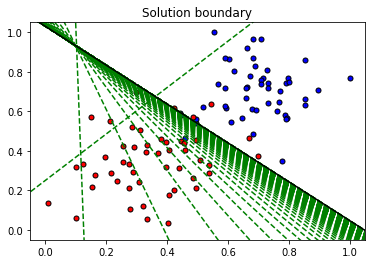

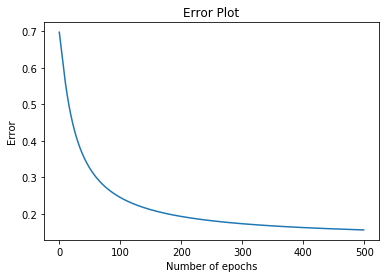

cost 1359.431505203247 ms


In [10]:
train(X, y, epochs, learnrate, True)